<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Water Management Notebook 2: Manning's equation and emptying reservoir

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

###Exercise 1: <a name="back1"></a>Manning's equation
The average velocity of water flowing in a canal may be estimated with Manning's equation. Manning's equation for the average velocity $v$ is

$v=\frac{1}{n}R_h^{2/3}S^{1/2}$

where $n$ is Manning's coefficient, $R_h$ is the hydraulic radius, and $S$ is the slope of the bottom of the canal. 
A detailed description of Manning's equation can be found <a href="http://en.wikipedia.org/wiki/Manning_formula" target="_blank"> here</a>.


We will consider canals with a trapezoidal cross-section as shown below. The slope of the banks is 1:1.

<img src= "http://s16.postimg.org/r1x965vpx/channel.png">

Our goal in this exercise is to compute the water height $h$ for a given design discharge $Q_d$ given the width $w$, the roughness coefficient $n$, and the bottom slope $S$. This exercise consists of 6 steps.

*Step 1*. Write a function that computes the hydraulic radius. The function should take two arguments: the height $h$ of the water above the bottom of the canal, and the width $w$ of the canal at the bottom (see Figure). The function should return the hydraulic radius. To test your function, the hydraulic radius for $h=2$ m, and $w=4$ m, is $R_h=1.2426$ m. (Note: in engineering practice it is, of course, ridiculous to give an answer with so many digits. But for testing code it is useful.)

*Step 2*. Write a function that computes the average velocity in the canal. The function should take four arguments: the height $h$, the width $w$, the roughness coefficient $n$, and the bottom slope $S$. Inside the function, call the function for the hydraulic radius that you wrote for step 1. To test your function, the average velocity for $h=2$ m, $w=4$ m, $n=0.025$, $S=0.005$ is $v=3.2692$ m/s. Remember that `2/3=0`, while `2.0/3=0.666...`.  

*Step 3*. Write a function that computes the total discharge in the canal. The function should take four arguments: the height $h$, the width $w$, the roughness coefficient $n$, and the bottom slope $S$. Inside the function, call the function for the average velocity. To test your function, the total discharge for $h=2$ m, $w=4$ m, $n=0.025$, $S=0.005$ is $Q=39.23$ m$^3$/s.

*Step 4*. Make a graph of total discharge $Q$ vs. the height of the water $h$, where $h$ varies from 1 to 4 m. Draw three lines for three different width $w=4$ m, $w=6$ m, $w=8$ m. Otherwise, use $n=0.025$, and $S=0.005$. Add a legend, labels on the axes, etc. 

*Step 5*. When you know the design discharge $Q_d$, you can find the corresponding water height $h$ from the graph you just produced. This is not very convenient though. Especially since the graph is for specific values of the roughness coefficient $n$ and the slope $S$. We want to find the water height that corresponds to a given $Q$. We need one additional function, let's call it `Qdiff` that computes the difference between the discharge computed with the discharge function you wrote in Step 3 and the design discharge you want. Inside the function, call the function for the total discharge that you wrote in Step 3. The input arguments of `Qdiff` are the height $h$, the width $w$, the roughness coefficient $n$, the bottom slope $S$, and the design discharge $Q_d$. `Qdiff` should return the difference between the design discharge and the discharge you compute with the specified values of $h$, $w$, $n$, and $S$. Test your `Qdiff` function. Use `fsolve` (see previous Notebook) to find the water height $h$ corresponding to the design discharge and the parameters of the canal $w$, $n$, $S$. Show that your code produces the correct result. 

*Step 6*. Compute the water height for $Q_d$ = 20, 40, 60, 80, 100 m$^3$/s, for $w=6$ m, $n=0.02$, $S=0.004$ and print them to the screen. 
Make a graph for $h$ vs $Q_d$.

<a href="#ex1answer">Answers to Exercise 1</a>

###Polynomial fit
The function `polyfit` may be used to fit a polynomial through a set of data. Given a set of $x$ and $y$ values, `polyfit` computes the parameters $p$ of a polynomial of degree $N$ that goes through the data

$f(x) = p_0 x^N + p_1 x^{N-1} + ... + p_{N-1}x + p_N$ 

Once you have computed the parameters $p_n$, you can evaluate the polynomial using the `polyval` function:

[ 3.01587302e-02 -7.90873016e-01  7.68174603e+00 -3.36662698e+01
  6.42880952e+01 -3.65428571e+01]


(-1.0, 8.0)

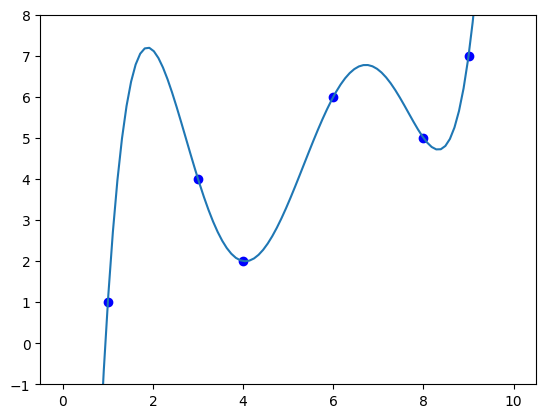

In [2]:
x = np.array([1,3,4,6,8,9])
y = np.array([1,4,2,6,5,7])
p = np.polyfit(x,y,5)
print(p)
x2 = np.linspace(0,10,100)
y2 = np.polyval(p,x2)
plt.plot(x,y,'bo')
plt.plot(x2,y2)
plt.ylim(-1,8)

When the degree of the polynomial is equal to the number of data points minus one, the polynomial goes exactly through the data points as shown above where there are 6 data points and a polynomial of degree 5 (hence, 6 $p$ values) is fitted through the data. Higher order polynomials often wiggle through the data and may give unreasonable values outside the range of the data. A smoother polynomial is obtained when the degree of the polynomial is smaller than the number of data points minus 1. The best fit is obtained by computing the parameters such that the sum of squared differences between the fitted line and the data is minimized. For example, let's fit a polynomial of order 3 through the data of the previous example

the values of p are: [ 0.00943775 -0.16406679  1.47407525 -0.22559713]


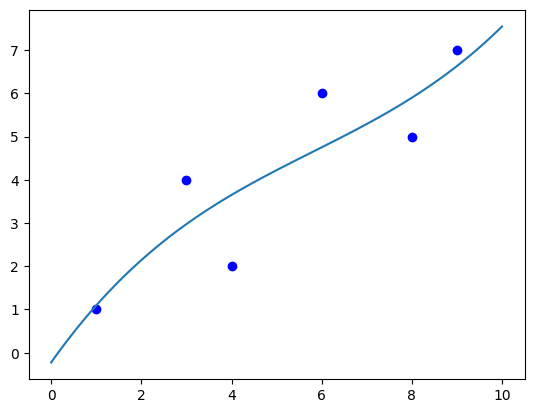

In [3]:
x = np.array([1,3,4,6,8,9])
y = np.array([1,4,2,6,5,7])
p = np.polyfit(x,y,3)
print('the values of p are:',p)
x2 = np.linspace(0,10,100)
y2 = np.polyval(p,x2)
plt.plot(x,y,'bo')
plt.plot(x2,y2)

***
###Exercise 2. <a name="back2"></a>Emptying a reservoir 
Consider a reservoir filled with water that is emptied by opening a gate at the bottom of the reservoir. 
The water level in the reservoir is measured with a pressure transducer on the bottom of the reservoir while it is being emptied. 
The rate of change of the water level $h$ in the reservoir is theoretically related to the water level in the reservoir as

$\frac{\text{d}h}{\text{d}t} = \alpha \sqrt{h-h_0}$

where $\alpha$ and $h_0$ are constants. Rearrangement of the differential equation gives

$\frac{1}{\sqrt{h-h_0}}\text{d}h = \alpha \text{d}t$

and integration gives

$\sqrt{h-h_0} = 2\alpha t + \beta$

where $\beta$ is a constant of integration. Rearrangment gives

$ h = 4\alpha^2 t^2 + 4\beta\alpha t + \beta^2 + h_0$

Hence, $h$ vs. $t$ is a parabola.

*Step 1*. The raw data of the experiment is provided in the file `emptying_reservoir.csv`. A `csv` file is an ascii file that you can open in a standard editor (csv stands for comma separated values). Load the column labeled as 'Pressure' from the data file. Note the units of pressure. Pressure measurements include both air pressure and the pressure caused by the water column. Note: if you want to specify one colomn to read with the `usecols` keyword, put square brackets around the column number to make it a list. This may be a bit confusing, but `usecols` expects a sequence. `(3)` is not a sequence, it is just the number 3, while `[3]` is a sequence as it is the data type list. Alternatively, the somewhat funny syntax `(3,)` is a tuple and would work. If you want to read more than one column, for example columns 2 and 3, you can type either `(2,3)` (which is a tuple of two values) or `[2,3]` (which is a list of two values).

*Step 2* The pressure transducer starts recording pressures before the start of the experiment (when the reservoir is openened and starts to empty) and is removed after a bit more than an hour. The pressure is recorded for some time after the pressure transducer is removed from the reservoir. Plot the pressure and determine at what index the experiment starts and at what index the experiment ends. Zooming is, unfortunately, not yet supported for inline graphs in IPython notebooks (v.1.0). Use the `xlim` and `ylim` functions to zoom in on the beginning and end of the experiment to determine the index of the beginning and end of the experiment. 

*Step 3*. Create a new array that only contains the pressure data during the experiment. Make a graph for pressure against time. Set time equal to zero at the beginning of the experiment and determine the time between measurements from the data file.

*Step 4*. Fit a parabola through the data using polyfit. Plot in one graph the data of the experiment and the fitted polynomial. Do you get a nice fit?

*Step 5*. Write a Python function for the change of water level with time $\text{d}h/\text{d}t$ based on the parabola of Step 4. Plot $\text{d}h/\text{d}t$ vs. $t$ based on the parabola. Next, compute the derivative numerically using the measured water levels during the experiment. Plot the numerical derivative based on the data on the same graph. Do you still get a good match between the model and the data?

<a href="#ex2answer">Answers to Exercise 2</a>

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [4]:
# Step 1
def Rh(h,w):
    A = (w * h) + (h * h)        # m^2, is the cross sectional area of the flow
    P = w + 2 * h * np.sqrt(2.)     # m, is the wetted perimeter of the channel
    rv = A / P
    return rv
Rh(2,4)

np.float64(1.2426406871192852)

In [5]:
# Step 2
def Vavg(h,w,n,S):
    rv = Rh(h,w)**(2.0/3) * np.sqrt(S) / n
    return rv
Vavg(2,4,0.025,0.005)

np.float64(3.2692041364531312)

In [6]:
# Step 3
def Qtot(h,w,n,S):
    A = (w+h) * h
    return A * Vavg(h,w,n,S)
Qtot(2,4,0.025,0.005)

np.float64(39.23044963743757)

Text(0, 0.5, 'Q (m$^3$/s)')

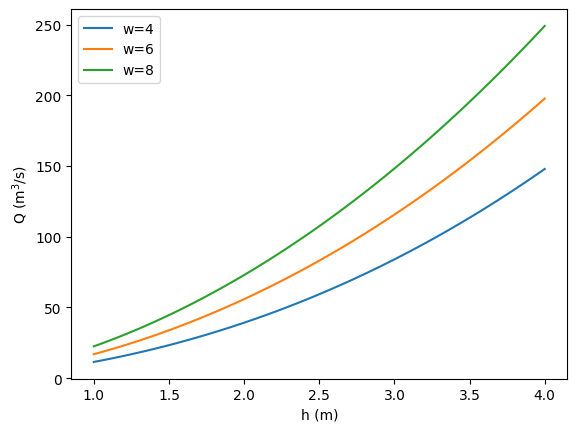

In [7]:
# Step 4
h = np.linspace(1,4,100)
Q = Qtot(h,4,0.025,0.005)
plt.plot(h,Q,label='w=4')
Q = Qtot(h,6,0.025,0.005)
plt.plot(h,Q,label='w=6')
Q = Qtot(h,8,0.025,0.005)
plt.plot(h,Q,label='w=8')
plt.legend(loc='best')
plt.xlabel('h (m)')
plt.ylabel('Q (m$^3$/s)')

In [8]:
# Step 5
def Qdiff(h,w,n,S,Qd):
    Qt = Qtot(h,w,n,S)
    return Qd - Qt
from scipy.optimize import fsolve
h50 = fsolve(Qdiff,3,args=(4,0.025,0.005,50))
print('design discharge is 50')
print('computed water height is ',h50)
print('discharge computed with Qtot is ',Qtot(h50,4,0.025,0.005))

design discharge is 50
computed water height is  [2.28088116]
discharge computed with Qtot is  [50.]


Design discharge is  [ 20  40  60  80 100]
Corresponding water height is  [1.03196415 1.54829374 1.95427027 2.29943954 2.60427215]


Text(0.5, 1.0, 'w=6 m, n=0.02, S=0.004')

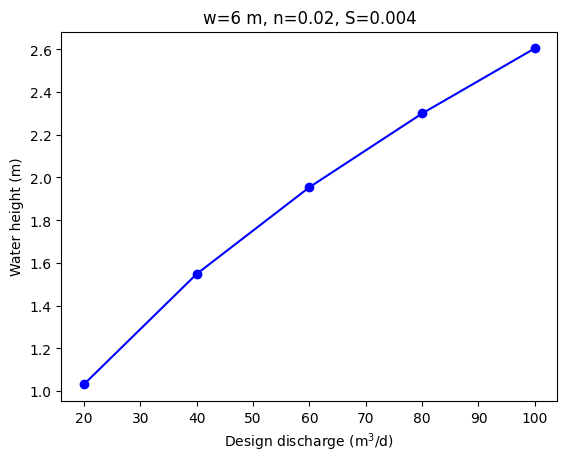

In [9]:
# Step 6
w = 6.0
n = 0.02
S = 0.004
h = np.zeros(5)
Qd = np.arange(20,101,20)
for i in range(len(h)):
    h[i] = fsolve(Qdiff, x0=1.0, args=(w,n,S,Qd[i]))[0]
print('Design discharge is ',Qd)
print('Corresponding water height is ',h)
plt.plot(Qd,h,'b-o')
plt.xlabel('Design discharge (m$^3$/d)')
plt.ylabel('Water height (m)')
plt.title('w=6 m, n=0.02, S=0.004')

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

In [10]:
# Step 1
head = np.loadtxt('emptying_reservoir.csv',skiprows=54,usecols=[1],delimiter=";")

Data from index 184 to 332


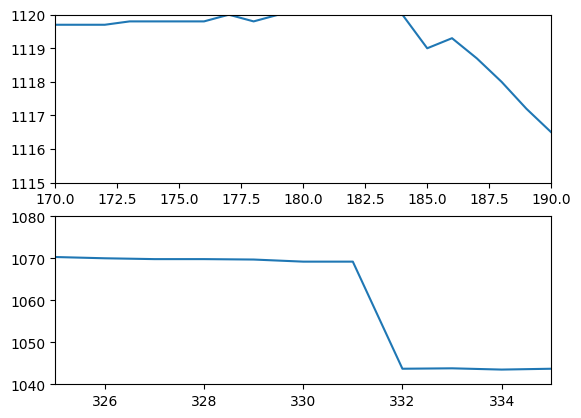

In [11]:
# Step 2
plt.subplot(211)
plt.plot(head)
plt.xlim(170,190)
plt.ylim(1115,1120)
plt.subplot(212)
plt.plot(head)
plt.xlim(325,335)
plt.ylim(1040,1080)
print('Data from index 184 to 332')

148


Text(0, 0.5, 'head (cm)')

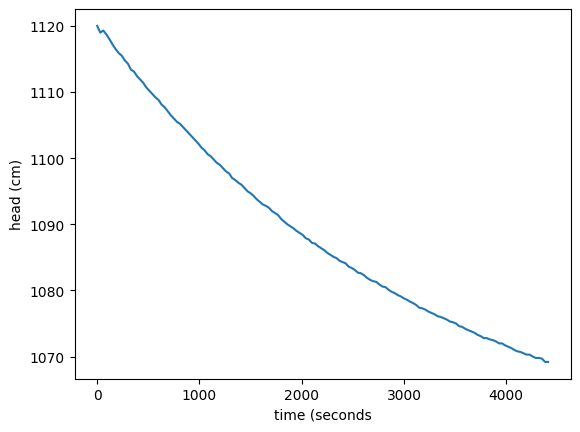

In [12]:
# Step 3
headnew = head[184:332]
print(len(headnew))
time = np.arange(0,len(headnew)*30,30)
plt.plot(time,headnew)
plt.xlabel('time (seconds')
plt.ylabel('head (cm)')

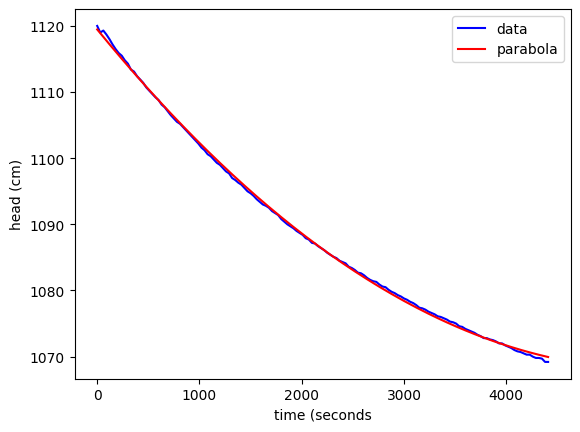

In [13]:
# Step 4
a = np.polyfit(time,headnew,2)
hfit = np.polyval(a,time)
plt.plot(time,headnew,'b',label='data')
plt.plot(time,hfit,'r',label='parabola')
plt.xlabel('time (seconds')
plt.ylabel('head (cm)')
plt.legend(loc='best')

Text(0, 0.5, 'head (cm)')

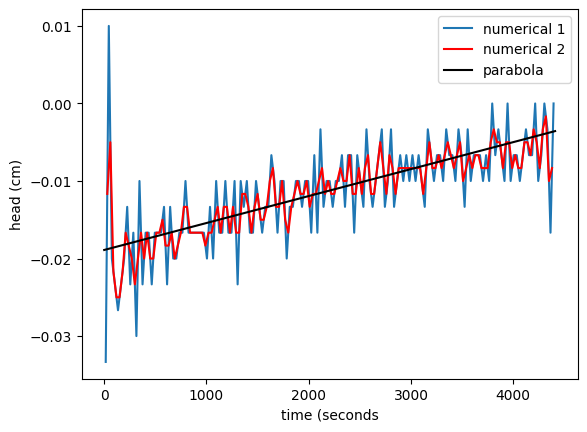

In [14]:
# Step 5
def dhdt(t):
    return 2*a[0]*t + a[1]
dhdtnum = (headnew[1:] - headnew[:-1]) / 30.0
plt.plot(0.5*(time[1:]+time[:-1]), dhdtnum,label='numerical 1')
dhdtnum2 = (headnew[2:] - headnew[:-2]) / 60.0
plt.plot(time[1:-1],dhdtnum2,'r',label='numerical 2')
dhdtpoly = dhdt(time)
plt.plot(time,dhdtpoly,'k',label='parabola')
plt.legend(loc='best')
plt.xlabel('time (seconds')
plt.ylabel('head (cm)')

<a href="#back2">Back to Exercise 2</a>